# Covariância e correlação:

Tanto a covariância quanto a correlação se refere à associação dos dados, o quanto por meio dela produz um resultado. Nesse sentido, a covariância está para a variação conjunta em duas ou mais variáveis apresentam na variação dos valores considerando a média, enquanto que a correlação está para o quão ambas estão relacionadas uma a outra, que pode ser medida através de um gráfico de regressão ou através de uma matriz de correlação.

Em síntese, portanto, concebe-se que a covariância é a medida de associação entre as variáveis, enquanto que a correlação se refere à relação conjunta entre elas. A covariância apresenta um domínio que pode ir do menos infinito ao mais infinito, enquanto que a correção pode ir do -1 ao 1.

A correlação que, por sua vez, apresenta um valor equivalente a zero ou próximo, compreende-se que apresenta baixa correlação. Gráficamente, pode-se compreender a correlação como:

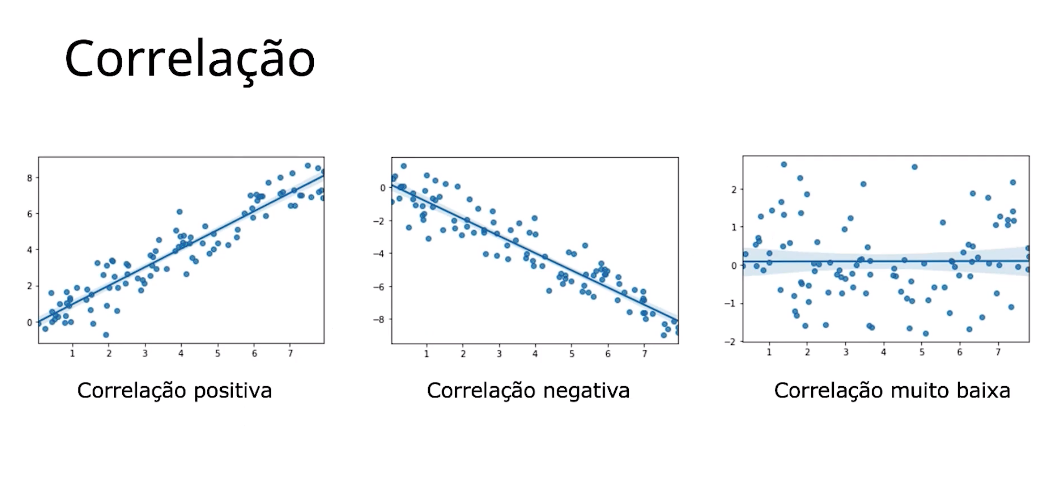

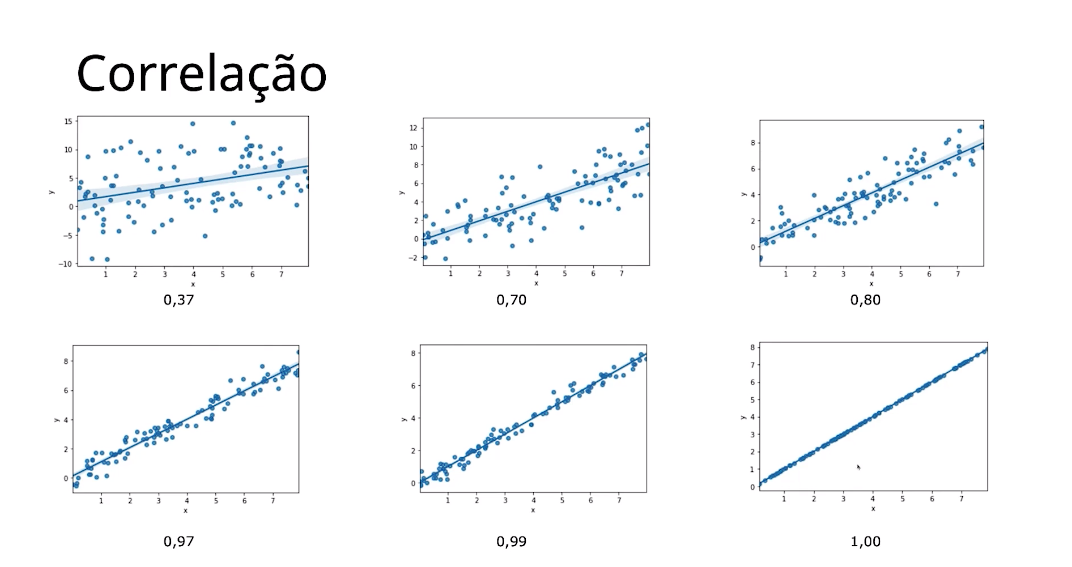

**Outliers:**

São pontos discrepantes em relação à média dos dados, o contingente que apresenta maior quantidade desses em proporção. Os outliers podem ser entendidos como dados incomuns, assim, em relação ao todo e são divididos em dois grupos: univariados e multivariados.

* Outilier univariado:

Valor de uma variável exclusiva que dista da média, como japonesas possuirem olhos claros.

* Outilier multivariado:

A sua compreensão se dá em conjunto de tal modo que as variáveis dissociadas uma das outras não apresentariam, à primeira vista, um caráter de outilier. Pode-se pensar, por exemplo, em alguém que possui 1.85 m de altura com uma massa de 55 kg. Esses dados indepedentes não poderiam representar um outilier, mas em conjunto sim, uma vez que comumente a massa de uma pessoa é diretamente à sua altura, no sentido de que pessoas mais altas costumam ter maior massa.

**Por que os outiliers ocorrem?**

A sua ocorrência pode estar associada à própria apreensão dos dados, como são econtrados na realidade, mas também pode derivar de erro na compilação e formatação dos dados, contando assimitrias.

**Quais as consequências que eles podem trazer?**

As consequências mais comuns que os outiliers podem promover é uma distorção dos dados, podendo influir tanto na média, tendo em vista que essa é sensível aos extremos, bem como inflacionar a variância ou ser ponto influente nos modelos de regressão - tal influência pode afetar negativamente a análise de tais modelos, fazendo com que esses não se adequem bem aos dados, produzindo más análises das variáveis que influem no resultado, como pode ser visto na imagem abaixo:

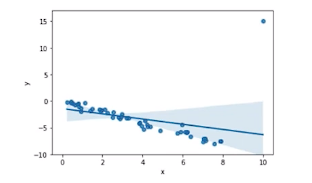

Como pode ser observado, a presença de um outilier no canto superior direito influi na geração do modelo de tal forma que a sua existência afeta em sua inclinação, fazendo com que ele "erre" para baixo nos dados a esquerda do número 4 do eixo x e "erre" para cima a direita desse valor. Tais erros fazem com que o R² do modelo seja afetado negativamente, sendo deletério à análise.

Uma das formas de se contornar tal problema se dá por três principais abordagens: remover os outiliers da análise, utilizar técnicas robustas que visam diminuir as influências dos outiliers na geração dos modelos de regressão e na transformação da variável resposta, isto é, utilizar um modelo matemático, responsável pela criação dos modelos de regressão, que melhor se adeque aos dados.   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setando um valor como semente da geração aleatória do
# numpy, que permite a cada vez que for executado manter
# uma constância dos valores.

np.random.seed(2360873)



In [2]:
df = sns.load_dataset("penguins")
df.shape

(344, 7)

In [3]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(333, 7)

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<ipython-input-5-d00273cf6ff7>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)


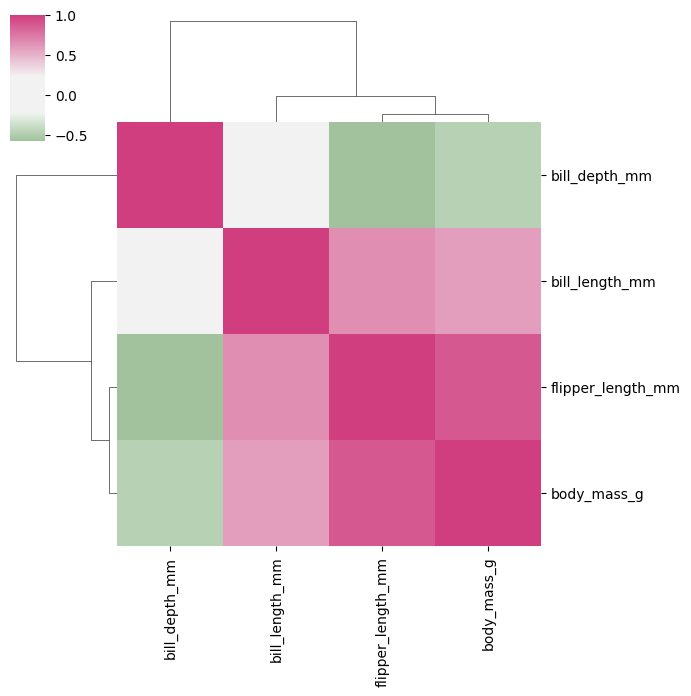

In [5]:
# Criando uma matriz de correlação:

# A variável "cmap" que estou criando serve como mapa da matriz
# de correlação, criando a paleta de cores que a irá compor.

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True,
                             sep=60, center="light")

sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)

In [6]:
# Criando um modelo de regressão linear:

N = 50

x = 0 + 8*np.random.rand(N)
y = -1*x + np.random.rand(N)*0.4

df2 = pd.DataFrame({"x":x, "y":y})
df2.head()

,x,y
0,2.257588,-2.179372
1,1.951297,-1.563126
2,6.228980,-5.863363
3,5.745567,-5.495602
4,2.104179,-1.981381


<Axes: xlabel='x', ylabel='y'>

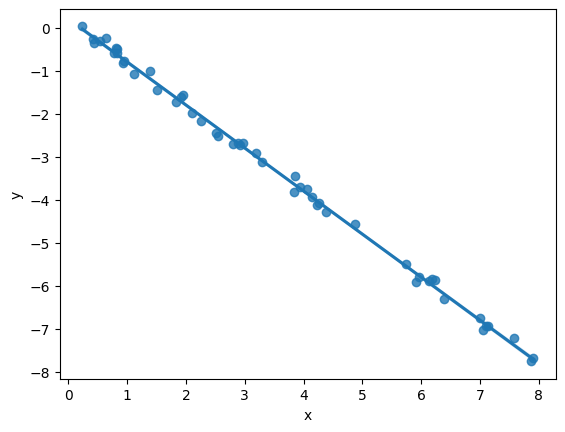

In [7]:
# Criando um gráfico de regressão linear
# com base no dataframe gerado.

sns.regplot(x="x", y="y", data=df2)

In [8]:
# Se eu quisesse criar um gráfico de regressão com base no dataframe
# dos pinquins:

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

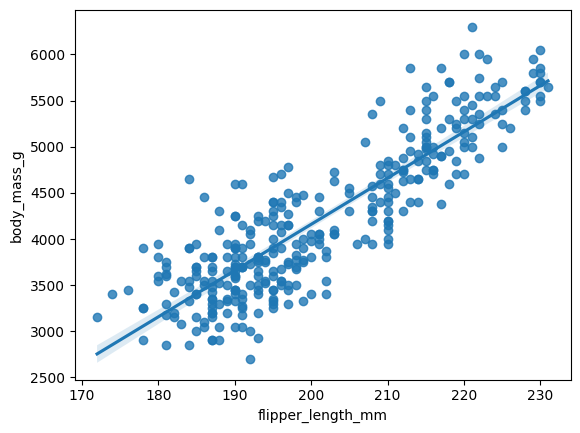

In [9]:
sns.regplot(x="flipper_length_mm", y="body_mass_g", data=df)

* **Gráfico exponenciais:**

In [10]:
N = 500

x = 0 + 8*np.random.rand(N)
y = np.exp(0.5*x + np.random.rand(N)*0.5)

df3 = pd.DataFrame({"x":x, "y":y})
df3.head()

,x,y
0,1.300637,2.067677
1,3.019605,5.050699
2,5.249222,14.145351
3,7.180431,50.927839
4,3.976214,10.552689


<Axes: xlabel='x', ylabel='y'>

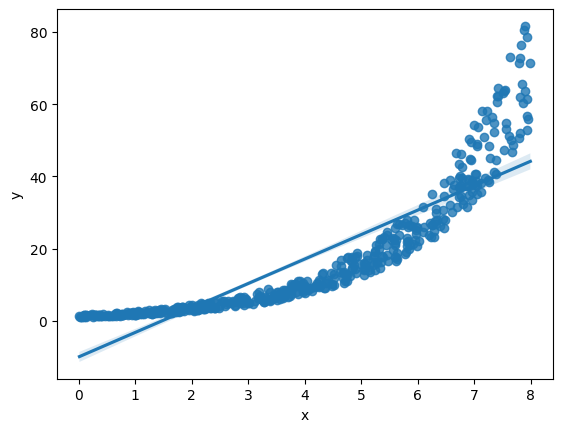

In [11]:
sns.regplot(x="x", y="y", data=df3)

In [12]:
# Uma das primeiras formas de analisar esse modelo é realizar um rank,
# como forma de observar se as valores do eixo x são representativas
# para a geração dos valores em y.

# Criando o dataframe que considera o rank das variáveis, combinando-as
# com o dataframe original. O parâmetro que cria o rank é df3.rank().

df3_rank = pd.concat([df3, df3.rank()], axis=1)
df3_rank.columns = ["x", "y", "x_rank", "y_rank"]

df3_rank

,x,y,x_rank,y_rank
0,1.300637,2.067677,84.0,60.0
1,3.019605,5.050699,199.0,179.0
2,5.249222,14.145351,327.0,297.0
3,7.180431,50.927839,455.0,465.0
4,3.976214,10.552689,256.0,271.0
...,...,...,...,...
495,0.778105,1.615063,46.0,31.0
496,2.489987,3.515011,172.0,136.0
497,2.111032,4.301913,144.0,161.0
498,1.841005,3.993684,122.0,155.0


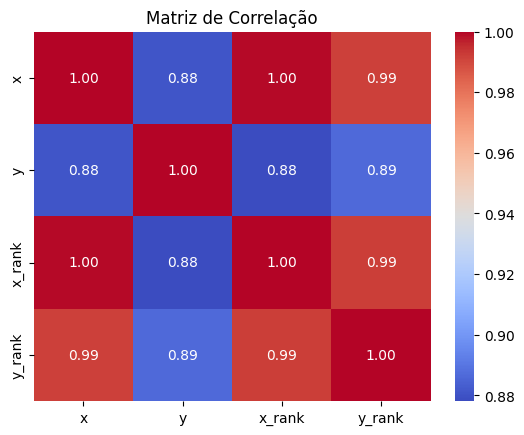

In [13]:
# Uma das formas de mensurarmos o impacto dos ranks
# podemos usar a matriz de correlação, vejamos:

df3_rank.corr()

# Criando o gráfico de matriz de correlação:
sns.heatmap(df3_rank.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

<Axes: xlabel='x_rank', ylabel='y_rank'>

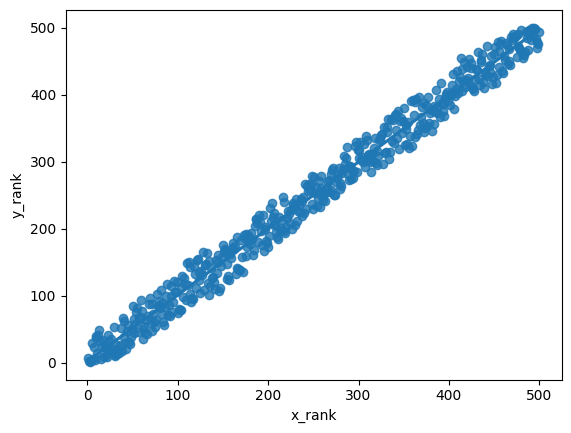

In [14]:
sns.regplot(x="x_rank", y="y_rank", data=df3_rank)

<Axes: xlabel='x', ylabel='y'>

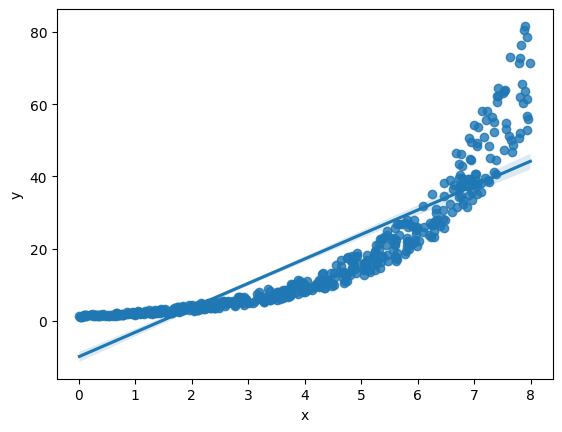

In [15]:
# Alterando a variável resposta para realizar um melhor modelo de regressão:

sns.regplot(x="x", y="y", data=df3)

In [16]:
# Temos esse modelo de regressão linear aplicado a um conjunto de dados
# que aparenta ter uma dinâmica exponencial. Uma boa forma de melhorarmos
# a sua análise é mudarmos o modelo - transformando a variável resposta -.
# A partir do gráfico, podemos pensar numa função matemática que melhor a ele
# se adeque. Vejamos:

df4 = df3.copy()

df4["log_y"] = np.log(df4["y"])

df4.head()

,x,y,log_y
0,1.300637,2.067677,0.726426
1,3.019605,5.050699,1.619527
2,5.249222,14.145351,2.649386
3,7.180431,50.927839,3.930410
4,3.976214,10.552689,2.356381


<Axes: xlabel='x', ylabel='log_y'>

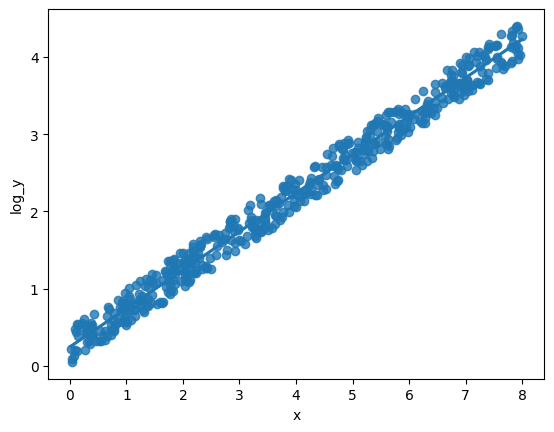

In [17]:
# Observe como o gráfico muda em relação ao anterior acima.
# Antes o outro formava uma curva exponencial enquanto a reta
# lhe atravessava. Agora, o gráfico parece uma reta linear,
# sendo atravessado por uma reta adaptada aos dados - certinha.

sns.regplot(x="x", y="log_y", data=df4)

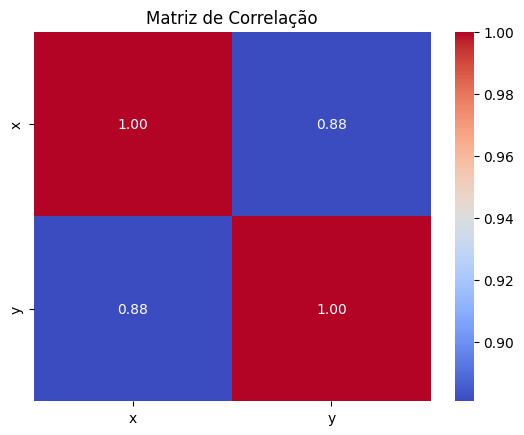

In [18]:
# Observando a nova correlação do modelo anterior com o novo:

# Matriz de correlação do primeiro modelo sem o logarítimo.

df3.corr()

# Criando o gráfico de matriz de correlação:
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

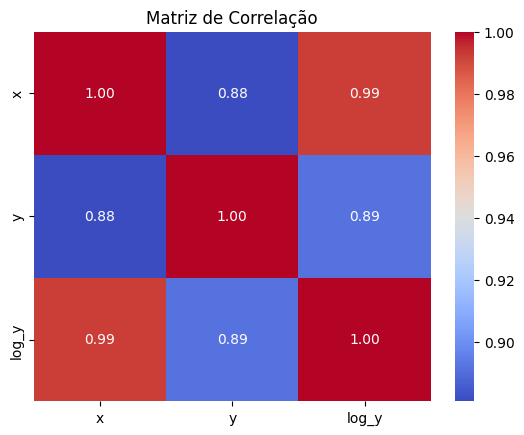

In [19]:
# Matriz de correlação do segundo modelo com o logarítimo.

# Criando o gráfico de matriz de correlação:

sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [20]:
# Analisando as variáveis y e log_y observe como são diferentes.
# Analisando a primeira linha da matriz, conseguimos observar que ela
# está melhor adequada com o x do que o y em relação a ele, apresentando
# correlação de 0.99, enquanto que o outro apenas 0.88.

# Gráfico de perfis de média:

Gráficos utilizados para econtrar uma média dos dados com base no intervalo amostral. Vejamos com o gráfico a seguir:

In [21]:
df_tips = sns.load_dataset("tips")

df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
# Criando uma coluna que mensura o percentual das gorjetas.

df_tips["tips_pct"] = (df_tips["tip"] / (df_tips["total_bill"] - df_tips["tip"])).round(2)

df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17


<ipython-input-23-3841f40295af>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="sex", y="tips_pct", data=df_tips,


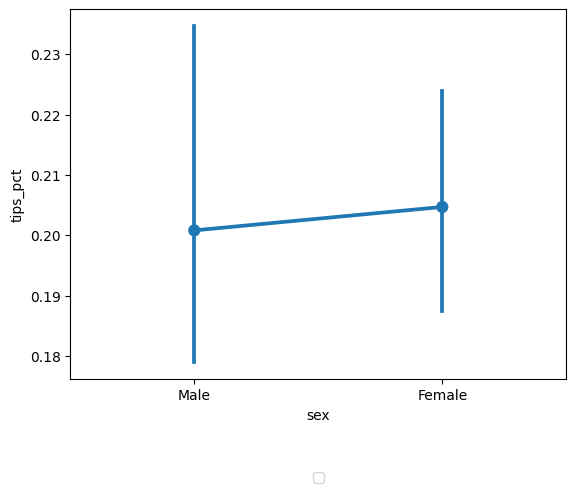

In [23]:
# Criando o gráfico de perfil das médias:

# A partir do gráfico a seguir, que compreende inclusive
# os respectivos intervalos de ganhos percentuais por gorjeta entre
# homens e mulheres, concebe-se que em média as mulheres ganham mais
# em relação aos homens.

sns.pointplot(x="sex", y="tips_pct", data=df_tips,
                  dodge=True, ci=95)

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -0.30), ncol=3)

<ipython-input-24-20400ef9983f>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="day", y="tips_pct", hue="sex",


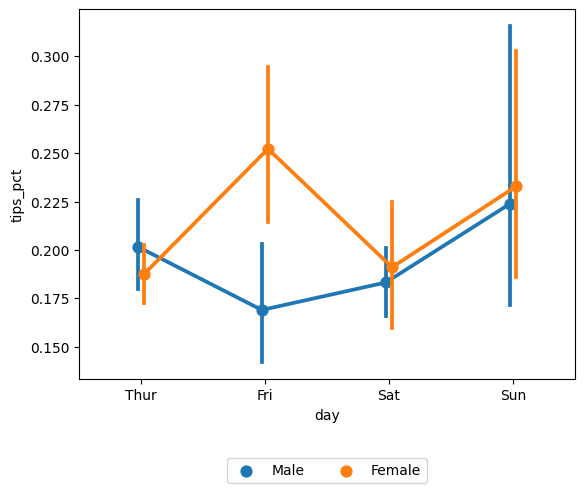

In [24]:
# Por meio dele consegue-se observar o intervalo das porcentagens das gorjetas
# recebidas por cada gênero, bem como as suas médias em cada dia. Além disso,
# compreende-se que as mulheres apresentam um ganho maior, em média, de gorjetas
# do que os homens, que ganham mais apenas na quinta-feira.


ax = sns.pointplot(x="day", y="tips_pct", hue="sex",
                 data=df_tips, dodge=True, ci=95)

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -0.30), ncol=3)